In [1]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [2]:
#importing all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import cv2
from tensorflow.keras import layers, models
from pathlib import Path
import os

In [7]:
# Checking the directories available in datasets folder
datasets='/content/Drive/MyDrive/AI/DL/Soil Craft/sorted'
os.listdir(datasets)

['test', 'valid', '.ipynb_checkpoints']

In [8]:
batch_size=64

In [9]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
# Create an instance of the ImageDataGenerator
trainDatagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=0.3,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],  # Adjust brightness between 0.5 and 1.5
    fill_mode='nearest'
)

In [11]:
trainData = trainDatagen.flow_from_directory(
    directory='/content/Drive/MyDrive/AI/DL/Soil Craft/sorted/train',
    class_mode='sparse',
    target_size=(224,224),
    batch_size=batch_size
)

Found 939 images belonging to 5 classes.


In [12]:
trainData.class_indices

{'black': 0, 'clay': 1, 'peat': 2, 'red': 3, 'sand': 4}

In [13]:
testDatagen = ImageDataGenerator(rescale=1.0/255)
testData = testDatagen.flow_from_directory(
    directory='/content/Drive/MyDrive/AI/DL/Soil Craft/sorted/test',
    class_mode='sparse',
    target_size=(224,224),
    batch_size=batch_size
)

Found 71 images belonging to 5 classes.


In [14]:
validDatagen = ImageDataGenerator(rescale=1.0/255)
validData = validDatagen.flow_from_directory(
    directory='/content/Drive/MyDrive/AI/DL/Soil Craft/sorted/valid',
    class_mode='sparse',
    target_size=(224,224),
    batch_size=batch_size
)

Found 73 images belonging to 5 classes.


In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [16]:
model = models.Sequential([
    base_model,
    # layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(224,224,3)),
	  # layers.BatchNormalization(),
    # layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.2),
    # layers.Conv2D(32, (3,3), padding='same', activation='relu'),
	  # layers.BatchNormalization(),
    # layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.3),
    # layers.Conv2D(64, (3,3), padding='same', activation='relu'),
	  # layers.BatchNormalization(),
    # layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.3),
    # layers.Conv2D(128, (3,3), padding='same', activation='relu'),
	  # layers.BatchNormalization(),
    # layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.3),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 17936581 (68.42 MB)
Trainable params: 3221

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Define callbacks
checkpoint = ModelCheckpoint('model_checkpoint.h5', save_best_only=True, monitor="val_accuracy", verbose=1)
early_stopping = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=15, verbose=1)

In [19]:
r=model.fit(trainData, validation_data=validData, validation_steps=validData.samples // batch_size, steps_per_epoch=trainData.samples // batch_size, epochs=20, verbose =1, callbacks=[early_stopping, checkpoint])


Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 1.5157 - accuracy: 0.3783 
Epoch 1: val_accuracy improved from -inf to 0.68750, saving model to model_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 836s 59s/step - loss: 1.5157 - accuracy: 0.3783 - val_loss: 0.7145 - val_accuracy: 0.6875
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 0.7685 - accuracy: 0.6971
Epoch 2: val_accuracy improved from 0.68750 to 0.89062, saving model to model_checkpoint.h5
14/14 [==============================] - 65s 5s/step - loss: 0.7685 - accuracy: 0.6971 - val_loss: 0.3470 - val_accuracy: 0.8906
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.4993 - accuracy: 0.8274
Epoch 3: val_accuracy improved from 0.89062 to 0.98438, saving model to model_checkpoint.h5
14/14 [==============================] - 65s 5s/step - loss: 0.4993 - accuracy: 0.8274 - val_loss: 0.1977 - val_accuracy: 0.9844
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.3564 - accuracy: 0.8686
Epoch 4: val_accuracy did not improve from 0.98438
14/14 [==============================] - 59s 4s/step - loss: 0.3564 - accuracy: 0.8686 - val_l

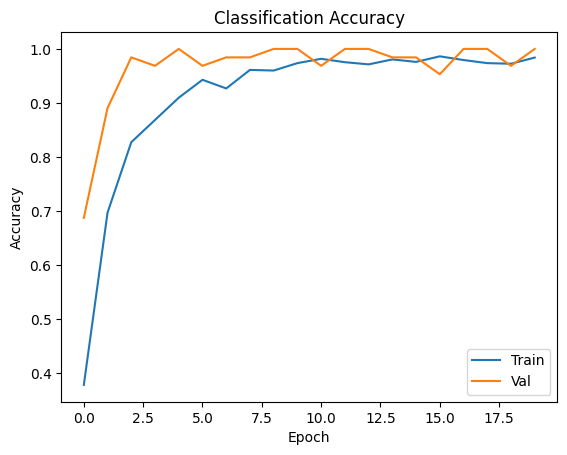

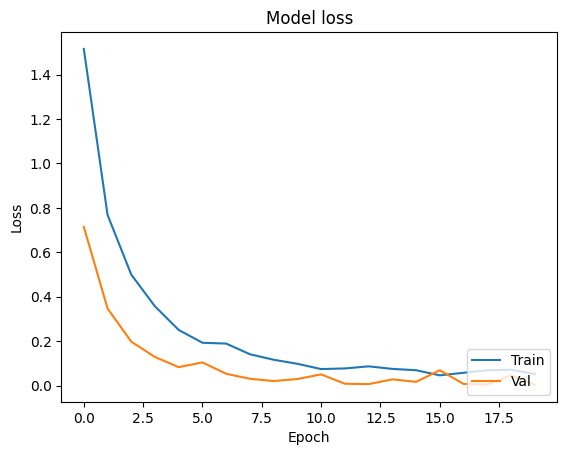

In [20]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
model.save('model.h5')

In [22]:
from tensorflow.keras.models import load_model

In [23]:
test_model=load_model('model.h5')
test_model.evaluate(testData)

2/2 [==============================] - 13s 9s/step - loss: 0.0155 - accuracy: 1.0000


[0.015471790917217731, 1.0]